In [1]:
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import statistics as stat

In [24]:
f=pd.read_csv('Data_jan.csv',low_memory=False)
f=f.fillna('nan')

In [21]:
len(f)

92234

In [22]:
check=[]
df_col=[]
for x in f.columns:
    if f[x].isnull().sum()>0 and f[x].isnull().sum()<80000:
        check.append([x,f[x].isnull().sum()])
        df_col.append(x)

In [115]:
df_col=list(set(df_col)-set(['主套餐生效日期',
'入网渠道',
'客户年龄',
'终端号',
'终端品牌',
'终端型号',
'Mylink活跃度',
'内地活跃度',
'国外活跃度',
'年月均消费',
'本地活跃度',
'过去6个月的平均数据量']))

In [116]:
df_col

['surv_opt_out_sts',
 'cntc_bind_end_dt',
 'dnc_vod_opt_out_sts',
 'bind_prg',
 'dum_cntc_bind',
 'ofr_nm',
 'non_cmhk_opt_out',
 'non_cmhk_opt_out_sts',
 'bil_opt_out_sts',
 'mlti_sim_cnt',
 'hs_os_sys',
 'eml_opt_out_sts',
 'ofr_ent_oult',
 'cntc_bind_eff_dt',
 '上次消费方式',
 'asgn_ofr_nm',
 'cntc_bind_prg',
 'cmhk_opt_out_sts',
 'ofr_eff_dt',
 'ofr_asgn_dt',
 'dno',
 'voc_opt_out_sts',
 'asgn_ofr_cd',
 'dum_cntc_bind_end_dt',
 'hs_type',
 'auto_ext_ind',
 'tes_opt_out_sts',
 'act_rsn',
 'bind_end_dt',
 'ofr_ent_user_grp',
 'sms_opt_out_sts',
 'vip_lvl',
 'main_cust_cd',
 'vip_lvl_exp_dt',
 'cmhk_opt_out',
 'hs_brnd_nm',
 'dnc_sms_opt_out_sts',
 'rt_plan_nm_monitoring']

In [ ]:
过去6个月的平均数据量
年月均消费
本地活跃度
Mylink活跃度
国外活跃度
终端型号
内地活跃度
入网渠道

In [23]:
ccc=pd.DataFrame(check).set_index(0).sort_values(by=1)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 28192 (\N{CJK UNIFIED IDEOGRAPH-6E20}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20027 (\N{CJK UNIFIE

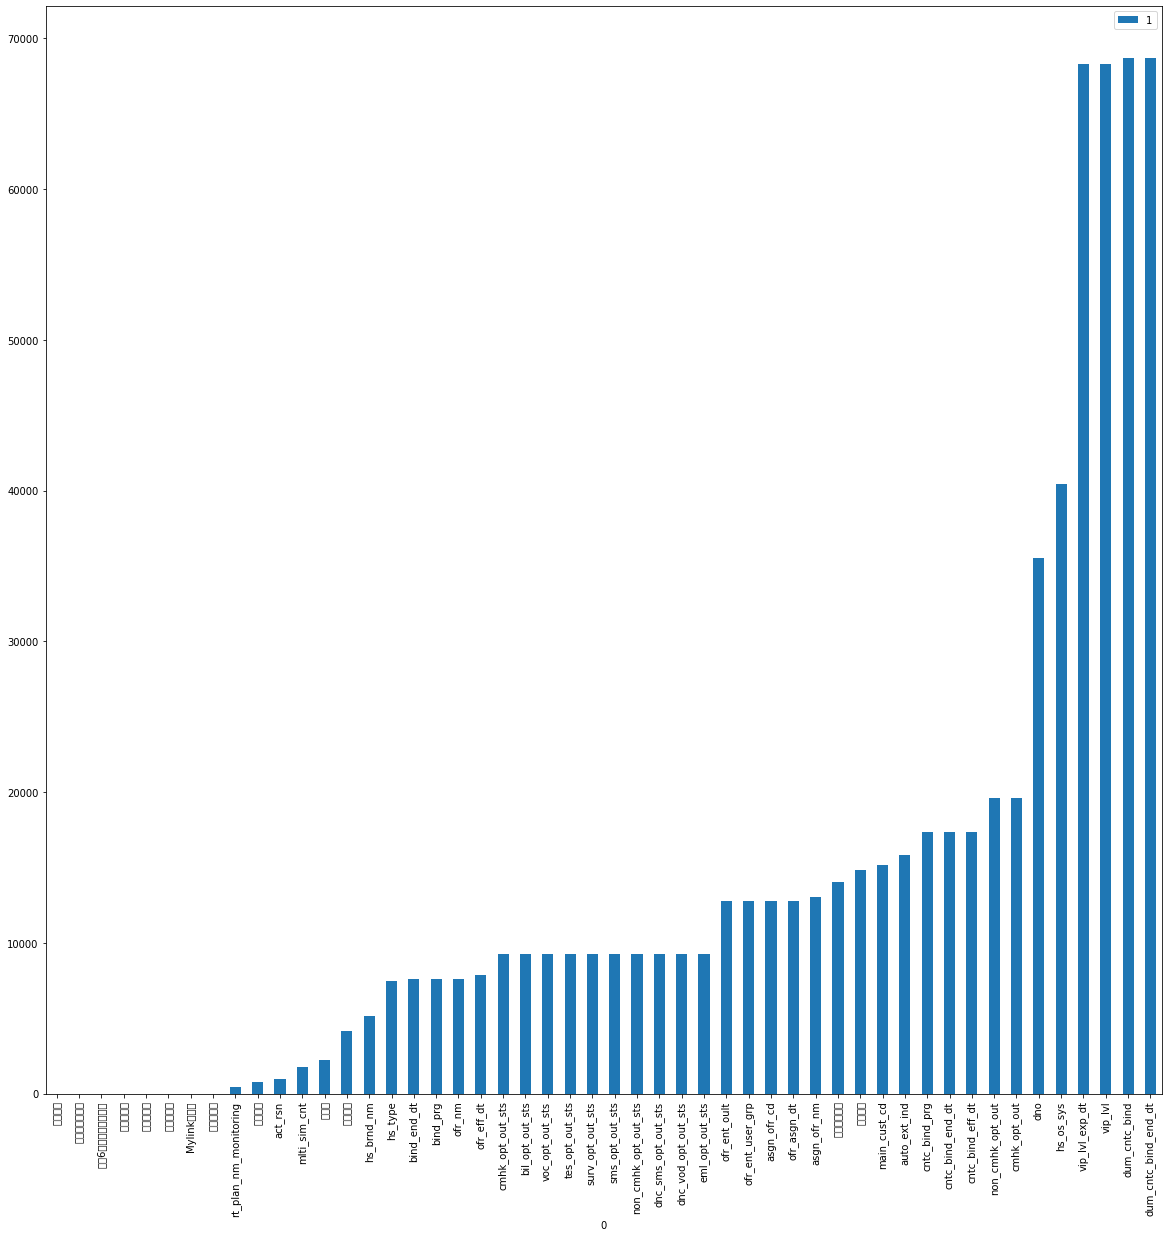

In [26]:
plt.rcParams["figure.figsize"] = [20, 20]
# lines = date_vol_df.reset_index().plot.scatter(x='index',y=0)
lines = ccc.plot.bar()

In [4]:
(len(f[f['是否离网']=='Y'])/len(f))*100

9.666717262614654

In [132]:
test=pd.read_csv('Data_mar.csv')
# feature=pd.read_csv('features_coefficient2.csv')
test=test.fillna('nan')

In [6]:
(len(test[test['是否离网']=='Y'])/len(test))*100

8.438016621869341

In [67]:
N_0_count=[]
tt=(test[test['是否离网']=='N']).drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    N_0_count.append(row[df_col].tolist().count('nan'))


In [68]:
Y_0_count=[]
tt=test[test['是否离网']=='Y'].drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    Y_0_count.append(row[df_col].tolist().count('nan'))


In [133]:
_0_count_train=[]
tt=f.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in row[df_col].tolist():
        if x=='nan':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_train.append(temp)


In [134]:
_0_count_test=[]
tt=test.drop(['离网日期'],axis=1)
for index, row in tt.iterrows():
    temp=[]
    for x in row[df_col].tolist():
        if x=='nan':
            temp.append(1)
        else:
            temp.append(0)
    _0_count_test.append(temp)

In [76]:
sat_Y=pd.DataFrame(Y_0_count,columns=['0_count']).join(pd.DataFrame([1]*len(Y_0_count),columns=['ref']))
barchart_Y=sat_Y.groupby(by=['0_count']).sum()

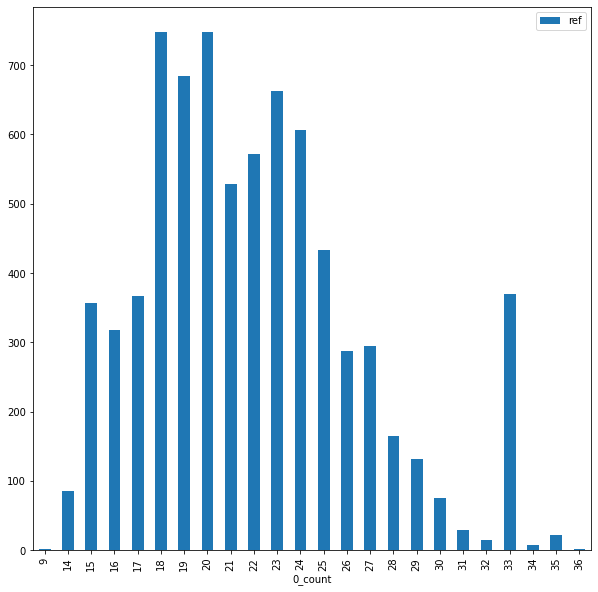

In [77]:
plt.rcParams["figure.figsize"] = [10, 10]
# lines = date_vol_df.reset_index().plot.scatter(x='index',y=0)
lines = barchart_Y.plot.bar()

In [78]:
sat_N=pd.DataFrame(N_0_count,columns=['0_count']).join(pd.DataFrame([1]*len(N_0_count),columns=['ref']))
barchart_N=sat_N.groupby(by=['0_count']).sum()

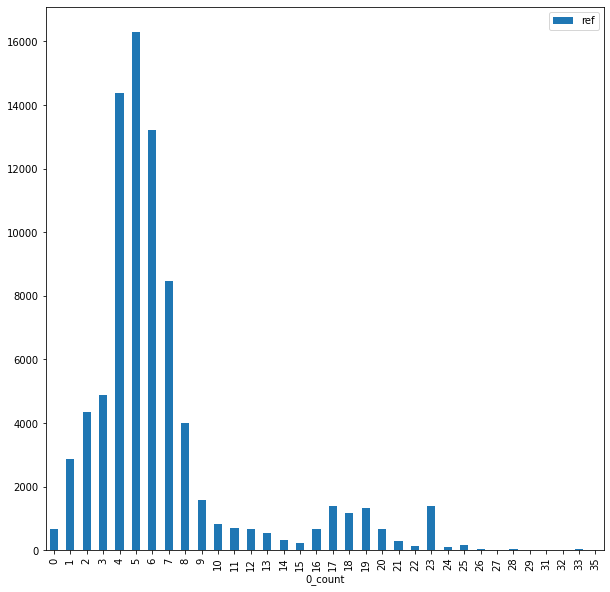

In [79]:
plt.rcParams["figure.figsize"] = [10, 10]
# lines = date_vol_df.reset_index().plot.scatter(x='index',y=0)
lines_2 = barchart_N.plot.bar()

In [82]:
stat.mean(Y_0_count),stat.mean(N_0_count)

(21.887778222044517, 6.559840817529724)

In [238]:
result=[]
for index, row in feature.iterrows():
    result.append(row[0])
result.remove('离网日期')

In [27]:
a=pd.get_dummies(f['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_train=b.to_frame('是否离网')
train_set=f.drop(['离网日期','是否离网','cmhk_opt_out_sts','non_cmhk_opt_out_sts','w_grp_ind'], axis=1)

In [240]:
col_dec=[]
for i in range(95):
    if (set(train_set[train_set.columns[i]].unique().tolist())=={'Y','N',0} or set(train_set[train_set.columns[i]].unique().tolist())=={'Y','N'}) and train_set.columns[i]!='是否离网':
        col_dec.append(train_set.columns[i])
        print(train_set.columns[i])

auto_ext_ind
bil_opt_out_sts
cmhk_opt_out
dnc_sms_opt_out_sts
dnc_vod_opt_out_sts
eml_opt_out_sts
non_cmhk_opt_out
sms_opt_out_sts
spl_hdl_lst_ind
surv_opt_out_sts
tes_opt_out_sts
voc_opt_out_sts
wth_auto_ext_ofr
wth_mlti_sim
是否携号入网
是否第一张合约届满
是否自动续约


In [135]:
a=pd.get_dummies(test['是否离网']).astype(int)
b=a['Y'].replace(1,int(-1))+a['N']
y_test=b.to_frame('是否离网')
test_set=test.drop(['离网日期','是否离网','cmhk_opt_out_sts','non_cmhk_opt_out_sts','w_grp_ind'], axis=1)

In [242]:
train_set=train_set[col_dec+result]
test_set=test_set[col_dec+result]

In [243]:
for x in col_dec:
        print(x)
        a1=pd.get_dummies(f[x]).astype(int)
        a2=pd.get_dummies(test[x]).astype(int)
        if a.shape[1]==3:
            if x in ['auto_ext_ind', 'wth_auto_ext_ofr','是否携号入网','是否第一张合约届满','是否自动续约']:
                b1=a1['N'].replace(1,int(-1))+a1[0].replace(1,int(0))+a1['Y']
                b2=a2['N'].replace(1,int(-1))+a2[0].replace(1,int(0))+a2['Y']
                train_set.at[:,[x]]=b1.to_frame(x)
                test_set.at[:,[x]]=b2.to_frame(x)
            else:
                b1=a1['Y'].replace(1,int(-1))+a1[0].replace(1,int(0))+a1['N']
                b2=a2['Y'].replace(1,int(-1))+a2[0].replace(1,int(0))+a2['N']
                train_set.at[:,[x]]=b1.to_frame(x)
                test_set.at[:,[x]]=b2.to_frame(x)
        elif a.shape[1]==2:
            if x in ['auto_ext_ind', 'wth_auto_ext_ofr','是否携号入网','是否第一张合约届满','是否自动续约']:
                b1=a1['N'].replace(1,int(-1))+a1['Y']
                b2=a2['N'].replace(1,int(-1))+a2['Y']
                train_set.at[:,[x]]=b1.to_frame(x)
                test_set.at[:,[x]]=b2.to_frame(x)
            else:
                b1=a1['Y'].replace(1,int(-1))+a1['N']
                b2=a2['Y'].replace(1,int(-1))+a2['N']
                train_set.at[:,[x]]=b1.to_frame(x)
                test_set.at[:,[x]]=b2.to_frame(x)

auto_ext_ind
bil_opt_out_sts
cmhk_opt_out
dnc_sms_opt_out_sts
dnc_vod_opt_out_sts
eml_opt_out_sts
non_cmhk_opt_out
sms_opt_out_sts
spl_hdl_lst_ind
surv_opt_out_sts
tes_opt_out_sts
voc_opt_out_sts
wth_auto_ext_ofr
wth_mlti_sim
是否携号入网
是否第一张合约届满
是否自动续约


In [244]:
data=['gprs_usg',
'gprs_usg_l1m',
'gprs_usg_l2m',
'过去1月当月数据用量',
'过去2月当月数据用量',
'过去3月当月数据用量','过去4月当月数据用量','过去5月当月数据用量','过去6个月的平均数据量','过去6月当月数据用量']

In [245]:
train_set.at[:,data]=train_set[data]*1E-6

In [246]:
test_set.at[:,data]=test_set[data]*1E-6

In [247]:
test_set[data]

,gprs_usg,gprs_usg_l1m,gprs_usg_l2m,过去1月当月数据用量,过去2月当月数据用量,过去3月当月数据用量,过去4月当月数据用量,过去5月当月数据用量,过去6个月的平均数据量,过去6月当月数据用量
0,20.054655,20.072149,13.386883,21.891267,25.236190,18.639507,20.212404,18.444347,20.746395,20.054655
1,18.447855,25.786738,35.889984,27.456425,30.916985,50.615317,30.186321,22.971159,30.099010,18.447855
2,0.000000,0.000000,0.000000,0.006242,0.003767,0.001760,0.000883,0.000000,0.002109,0.000000
3,6.319932,8.322166,3.826727,5.282335,4.812649,4.953213,6.870274,5.036742,5.545857,6.319932
4,3.209420,2.514846,1.802651,1.444235,2.522236,3.930155,3.343914,2.446531,2.816082,3.209420
...,...,...,...,...,...,...,...,...,...,...
101681,0.319405,0.116116,0.283810,0.024948,0.333550,0.055529,0.301918,0.322796,0.226358,0.319405
101682,26.882535,19.574679,30.596648,23.627446,21.349842,19.612601,15.651787,26.290867,22.235846,26.882535
101683,0.000000,0.000000,0.000000,1.783382,0.000000,0.000000,0.000000,0.000000,0.297230,0.000000
101684,1.595140,0.356092,0.000000,1.698134,0.000000,2.708393,0.000000,0.000000,1.000278,1.595140


--------------------SVM-------------------------

In [99]:
clf = svm.SVC(kernel='linear')
# clf = svm.NuSVC(kernel='rbf',nu=0.01)

In [92]:
train_set.iloc[:90000].to_numpy()
y_train.iloc[:90000]['是否离网'].to_numpy()

array([ 1,  1,  1, ..., -1,  1,  1])

In [32]:
np.array(_0_count_train[0:75000])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [105]:
y_train.iloc[0:75000]['是否离网'].to_numpy()

array([1, 1, 1, ..., 1, 1, 1])

In [119]:
clf.fit(np.array(_0_count_train[0:80000]), y_train.iloc[0:80000]['是否离网'].to_numpy())

SVC(kernel='linear')

In [218]:
train_set.iloc[0:800000].shape

(92234, 189)

In [120]:
y_pred = clf.predict(np.array(_0_count_train[80000:]))

In [136]:
y_pred = clf.predict(np.array(_0_count_test))

In [66]:
len(_0_count_test)

88919

In [121]:
val=y_pred-y_train.iloc[80000:]['是否离网'].to_numpy()

In [137]:
val=y_pred-y_test['是否离网'].to_numpy()

In [140]:
len(np.nonzero(val)[0])

524

In [124]:
(len(y_train.iloc[80000:])-len(np.nonzero(val)[0]))/len(y_train.iloc[80000:])*100


99.61582475069478

In [141]:
(len(y_test)-len(np.nonzero(val)[0]))/len(y_test)*100


99.48468815766182

In [114]:
1062/len(y_train.iloc[80000:])*100

8.680725846002943

In [72]:
(437/len(y_test))*100

0.49145851842688293

In [74]:
437/(437+80979)*100

0.5367495332612754

In [75]:
2/(7503)*100

0.026656004264960682

In [142]:
cm = confusion_matrix(y_train.iloc[80000:]['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [12234, 101686]

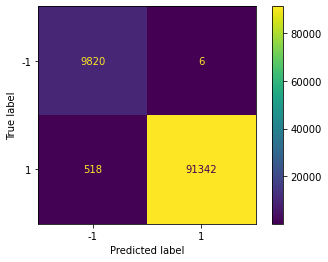

In [143]:
cm = confusion_matrix(y_test['是否离网'].astype(int).to_numpy(), y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [144]:
9820/9826*100

99.93893751272135

In [145]:
91342/(91342+518)*100

99.43609841062487

In [131]:
temp=pd.DataFrame({'feature':df_col,'coeff':clf.coef_[0]})
temp.to_csv('features_coefficient4.csv',encoding='utf-8-sig',index=False)

In [54]:
pd.DataFrame(clf.support_vectors_)

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.655317,27.0,5.0,147.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.894577,9.0,43.0,38.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.756068,30.0,312.0,177.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,5.444678,29.0,199.0,173.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2.434536,8.0,321.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,18.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,95.0,0.0,0.0,0.0,18.0,0.000000,0.0,0.0,11.0
934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,133.0,0.0,0.0,0.0,31.0,0.000000,0.0,0.0,0.0
935,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,6.386421,19.0,59.0,122.0
936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,51.0,3.0,0.0,0.0,4.0,0.000000,0.0,0.0,8.0
